In [1]:
import numpy as np
import pandas as pd
from streaming_elastic import StreamingDepth
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("./data/sample_data1.csv")
print(df.shape)
df.head()

(13, 960)


,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_950,C_951,C_952,C_953,C_954,C_955,C_956,C_957,C_958,C_959
0,17.85,18.17,18.48,17.53,17.53,18.17,18.17,17.21,18.17,17.85,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
1,17.85,18.17,18.48,17.53,17.85,18.17,18.17,17.53,18.17,18.17,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
2,17.85,18.17,18.80,17.53,17.85,18.48,18.17,17.53,18.17,18.17,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
3,17.85,18.17,18.80,17.53,17.85,18.17,18.17,17.21,18.17,18.17,...,24.98,24.41,24.98,25.36,25.55,24.79,24.79,25.74,25.74,24.41
4,16.89,17.21,17.53,16.58,16.89,17.21,16.89,16.26,17.21,16.89,...,25.17,24.41,25.17,25.55,25.55,24.79,24.98,25.74,25.74,24.60


<Figure size 2500x500 with 0 Axes>

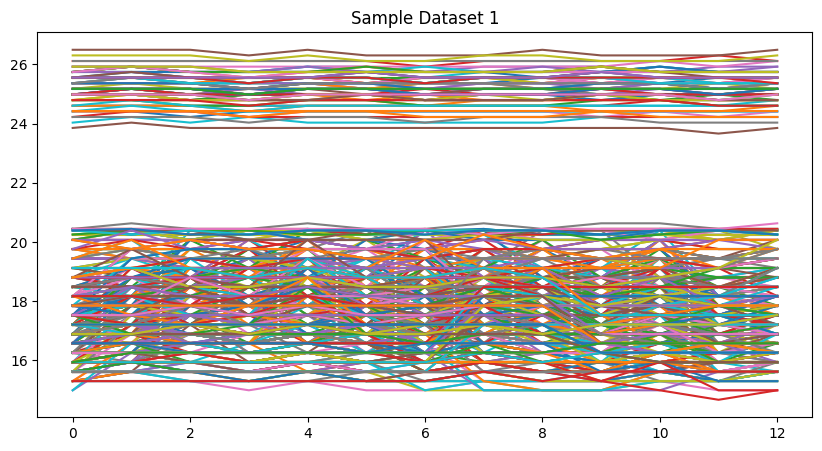

In [3]:
plt.figure(figsize=(25,5))
df.iloc[:,:-1].plot(legend=None, figsize=(10,5))
plt.title("Sample Dataset 1")
plt.show()

In [4]:
def plot_outliers(df, outliers, start=0, n_timepts=None):
    colors = {False: 'gray', True: 'red'}

    if (n_timepts is None):
        n_timepts = df.shape[0] - 1

    cmap_amp = ListedColormap([colors[label] for label in outliers['amp']])
    cmap_phs = ListedColormap([colors[label] for label in outliers['phs']])
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='not outlier', markerfacecolor='gray', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='outlier', markerfacecolor='red', markersize=10)
    ]

    df.plot(colormap=cmap_amp, alpha=0.8, lw=0.7, figsize=(7, 5))
    plt.xticks(rotation=45)
    plt.title("Amplitude outliers plot")
    plt.legend(handles=legend_handles)

    if start is not None:
        plt.axvline(x=df.index[start], alpha=0.8, lw=0.7, color='b')
        plt.axvline(x=df.index[n_timepts], alpha=0.8, lw=0.7, color='b')

    df.plot(colormap=cmap_phs, alpha=0.8, lw=0.7, figsize=(7, 5))
    plt.xticks(rotation=45)
    plt.title("Phase outliers plot")
    plt.legend(handles=legend_handles)

    if n_timepts is not None:
        plt.axvline(x=df.index[start], alpha=0.8, lw=0.7, color='b')
        plt.axvline(x=df.index[n_timepts], alpha=0.8, lw=0.7, color='b')

    print('Amplitude outliers:',df.columns[outliers['amp']])
    print('Phase outliers:', df.columns[outliers['phs']])

In [17]:
start = 0
n_timepts = 12

F = df[start:n_timepts].iloc[:,:-1].to_numpy()
time_points = np.linspace(0, 1, F.shape[0])

depths = StreamingDepth(F)
elastic_out = depths.elastic_outliers()

Amplitude outliers: Index(['C_12', 'C_13', 'C_28', 'C_29', 'C_30', 'C_31', 'C_41', 'C_42', 'C_44',
       'C_45', 'C_53', 'C_57', 'C_61', 'C_63', 'C_68', 'C_69', 'C_71', 'C_77',
       'C_78', 'C_80', 'C_81', 'C_82', 'C_83', 'C_84', 'C_85', 'C_87', 'C_89',
       'C_90', 'C_91', 'C_92', 'C_93', 'C_94'],
      dtype='object')
Phase outliers: Index([], dtype='object')


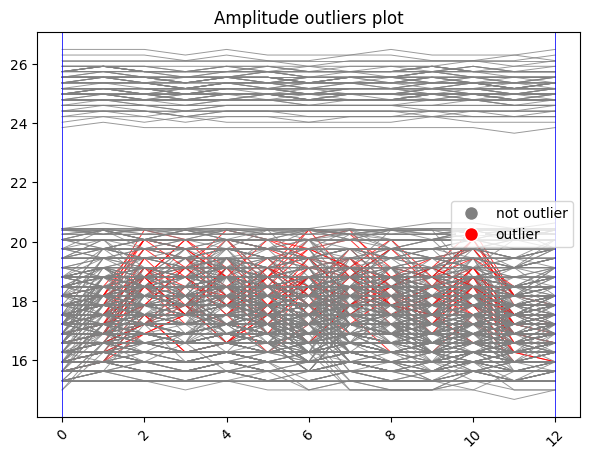

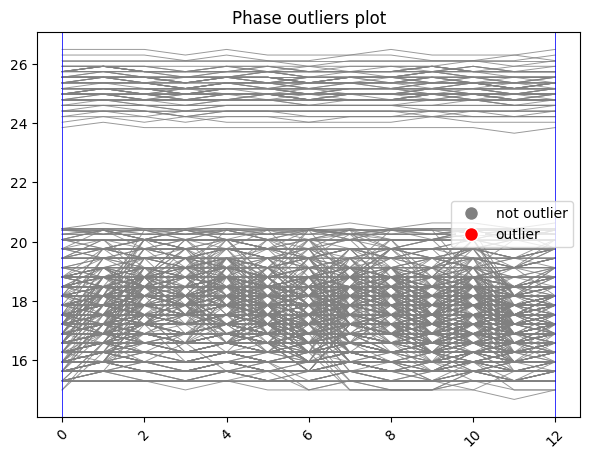

In [18]:
plot_outliers(df.iloc[:,:-1], elastic_out.labels, start, n_timepts)

In [11]:
print(df.iloc[:,:-1].shape)
print('number of labels:',len(elastic_out.labels['amp']))

(13, 959)
number of labels: 959


Text(0.5, 1.0, 'New time series: C_959')

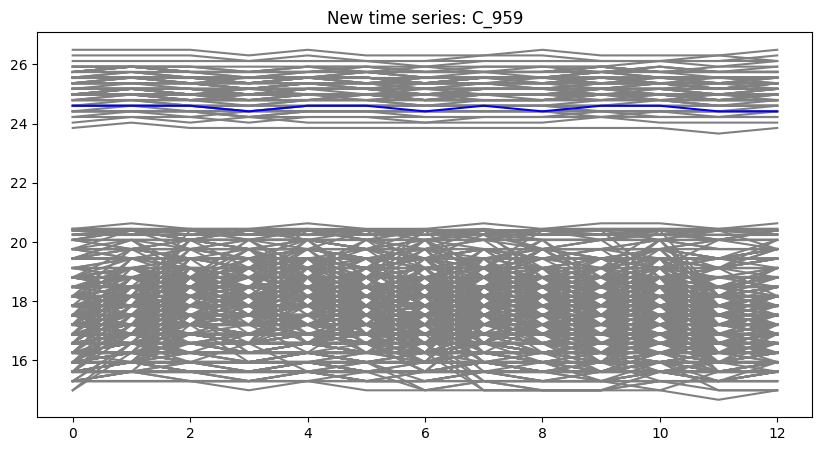

In [19]:
F_new = df[start:n_timepts].iloc[:,959].T.to_numpy() # new time series we are introducing
ax = df.iloc[:, :-1].plot(figsize=(10, 5), color='gray', legend=False)
df.iloc[:, 959].plot(ax=ax, color='blue')
plt.title("New time series: C_959")

In [20]:
depths.prog_update(F_new)
print(df.iloc[:,959])
print(depths.labels['amp'][-1])

0     24.60
1     24.60
2     24.60
3     24.41
4     24.60
5     24.60
6     24.41
7     24.60
8     24.41
9     24.60
10    24.60
11    24.41
12    24.41
Name: C_959, dtype: float64
False


In [21]:
print(df.shape)
print('number of labels:',len(depths.labels['amp']))

(13, 960)
number of labels: 960


Amplitude outliers: Index(['C_12', 'C_13', 'C_28', 'C_29', 'C_30', 'C_31', 'C_41', 'C_42', 'C_44',
       'C_45', 'C_53', 'C_57', 'C_61', 'C_63', 'C_68', 'C_69', 'C_71', 'C_77',
       'C_78', 'C_80', 'C_81', 'C_82', 'C_83', 'C_84', 'C_85', 'C_87', 'C_89',
       'C_90', 'C_91', 'C_92', 'C_93', 'C_94'],
      dtype='object')
Phase outliers: Index([], dtype='object')


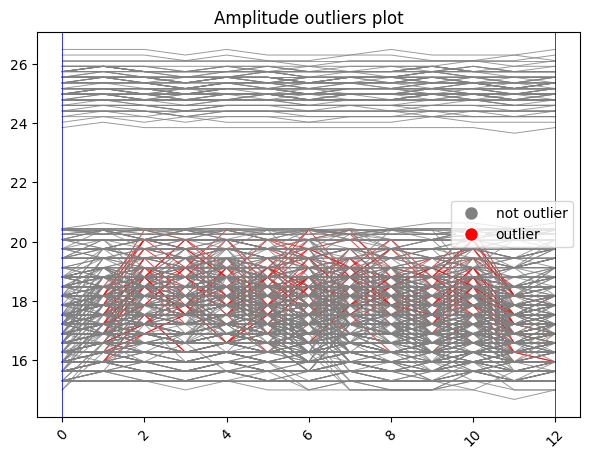

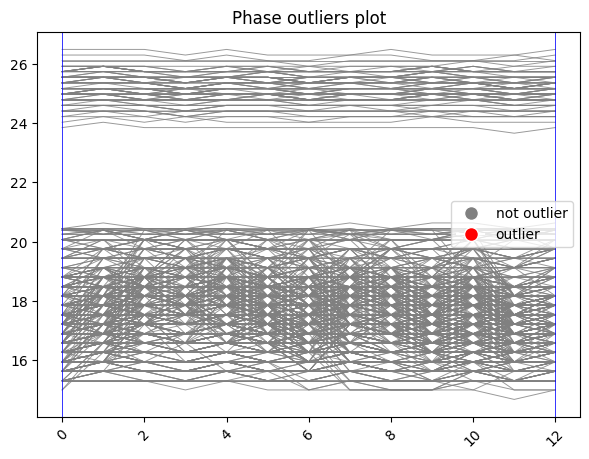

In [15]:
plot_outliers(df, depths.labels, start, n_timepts)